# Car Insurance Modeling


### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load data as dataframe
df = pd.read_csv("Car_insurance_clean+EDA.csv",index_col=0)

In [4]:
df.head()

AGE  DRIVING_EXPERIENCE  CREDIT_SCORE  VEHICLE_OWNERSHIP  MARRIED  \
0    3                   0      0.629027                1.0      0.0   
1    0                   0      0.357757                0.0      0.0   
2    0                   0      0.493146                1.0      0.0   
3    0                   0      0.206013                1.0      0.0   
4    1                   1      0.388366                1.0      0.0   

   ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS  OUTCOME  GENDER  \
0            12.0                    0     0               0      0.0       0   
1            16.0                    0     0               0      1.0       1   
2            11.0                    0     0               0      0.0       0   
3            11.0                    0     0               0      0.0       1   
4            12.0                    2     0               1      1.0       1   

   VEHICLE_YEAR(before 2015)  VEHICLE_TYPE(sports car)  
0                          0                         0  
1                          1                         0  
2                          1                         0  
3                          1                         0  
4                          1                         0

In [5]:
df.columns

Index(['AGE', 'DRIVING_EXPERIENCE', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP',
       'MARRIED', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME', 'GENDER', 'VEHICLE_YEAR(before 2015)',
       'VEHICLE_TYPE(sports car)'],
      dtype='object')

## Split the Data

In [6]:
#Take the 6 best Feauters
from sklearn.model_selection import train_test_split
X, y = df.drop(['OUTCOME','CREDIT_SCORE','MARRIED','ANNUAL_MILEAGE','GENDER','VEHICLE_YEAR(before 2015)', 'VEHICLE_TYPE(sports car)'],axis=1), df['OUTCOME']


In [7]:
X.head()

AGE  DRIVING_EXPERIENCE  VEHICLE_OWNERSHIP  SPEEDING_VIOLATIONS  DUIS  \
0    3                   0                1.0                    0     0   
1    0                   0                0.0                    0     0   
2    0                   0                1.0                    0     0   
3    0                   0                1.0                    0     0   
4    1                   1                1.0                    2     0   

   PAST_ACCIDENTS  
0               0  
1               0  
2               0  
3               0  
4               1

In [8]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Split data into 80% train and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=42)

<AxesSubplot:>

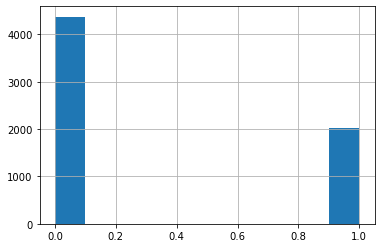

In [10]:
y_train.hist()

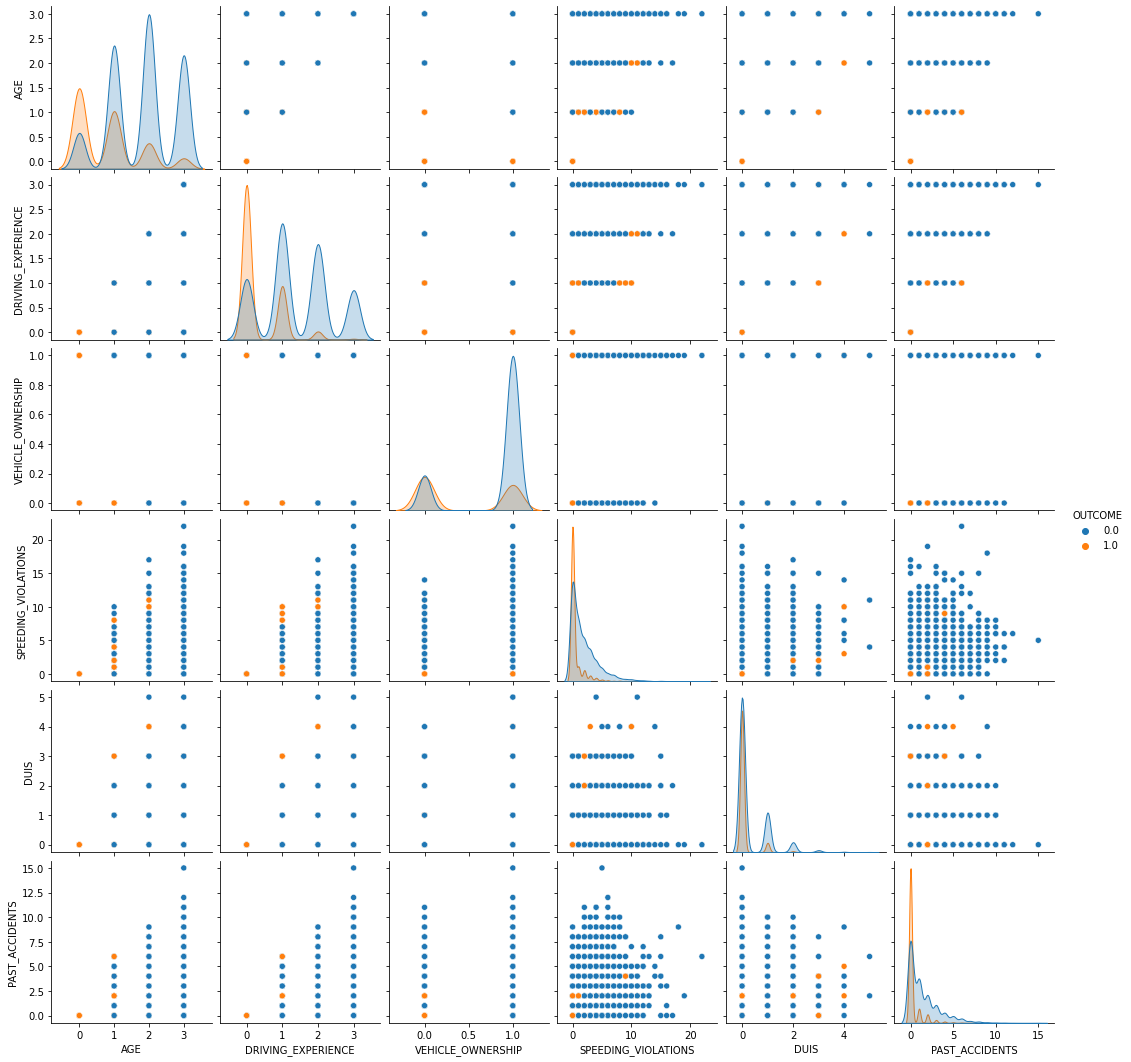

In [11]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='OUTCOME');

In [12]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [13]:
y_train.value_counts()

0.0    4373
1.0    2027
Name: OUTCOME, dtype: int64

In [14]:
y_test.value_counts()

0.0    1367
1.0     633
Name: OUTCOME, dtype: int64

In [15]:
y.value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [16]:
np.mean(y_train)

0.31671875

## Modeling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
#import lightgbm as ltb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score


In [18]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

### LogisticRegression

In [19]:
lr_c=LogisticRegression(random_state=42, solver='lbfgs',max_iter=400 )
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('Accuracy on training set:',lr_c.score(X_train,y_train))
print('Accuracy on validation set:',lr_c.score(X_val,y_val))

Accuracy on training set: 0.800625
Accuracy on validation set: 0.800625


Confusion Matrix for Logistic Regression Classifier 



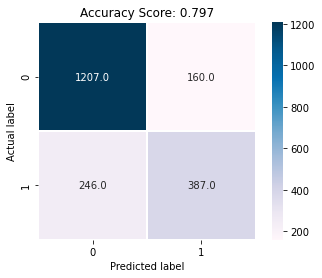

In [20]:
#Confusion matrix for logistic regression model
print("Confusion Matrix for Logistic Regression Classifier","\n")
score = round(accuracy_score(y_test, lr_pred),3) 
cm1 = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n")

In [21]:
print('Logistic regression validation metrics: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, lr_c.predict(X_test)), 
         precision(y_test, lr_c.predict(X_test)), 
         recall(y_test, lr_c.predict(X_test)),
         F1(y_test, lr_c.predict(X_test))
        )
     )

Logistic regression validation metrics: 
 Accuracy: 0.7970 
 Precision: 0.7075 
 Recall: 0.6114 
 F1: 0.6559


### Random Forest

In [22]:
rf_clf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict(X_test)
rf_ac=accuracy_score(y_test, rf_pred)
print('Accuracy on training set:',rf_clf.score(X_train,y_train))
print('Accuracy on validation set:',rf_clf.score(X_val,y_val))

Accuracy on training set: 0.81703125
Accuracy on validation set: 0.783125


In [23]:
print('RandomForestClassifiern: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, rf_clf.predict(X_test)), 
         precision(y_test, rf_clf.predict(X_test)), 
         recall(y_test, rf_clf.predict(X_test)),
         F1(y_test, rf_clf.predict(X_test))
        )
     )

RandomForestClassifiern: 
 Accuracy: 0.7920 
 Precision: 0.6776 
 Recall: 0.6540 
 F1: 0.6656


### Decision Tree

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
clf_pred = clf.predict(X_test)
clf_ac=accuracy_score(y_test, clf_pred)
print('Accuracy on training set:',clf.score(X_train,y_train))
print('Accuracy on validation set:',clf.score(X_val,y_val))

Accuracy on training set: 0.81765625
Accuracy on validation set: 0.78375


In [25]:
print('Decision Tree: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, clf.predict(X_test)), 
         precision(y_test, clf.predict(X_test)), 
         recall(y_test, clf.predict(X_test)),
         F1(y_test, clf.predict(X_test))
        )
     )

Decision Tree: 
 Accuracy: 0.7920 
 Precision: 0.6848 
 Recall: 0.6351 
 F1: 0.6590


### SVC

In [26]:
svc_r=SVC(kernel='rbf', random_state=0, probability=True)
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_ac=accuracy_score(y_test, svr_pred)
svr_val=svc_r.score(X_val,y_val)
pred_prob1 = svc_r.predict_proba(X_test)
print('Accuracy of training set: ', svr_ac)
print('Accuracy of training set: ', svr_val)


Accuracy of training set:  0.7955
Accuracy of training set:  0.795


In [27]:
print('SVC: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, svc_r.predict(X_test)), 
         precision(y_test, svc_r.predict(X_test)), 
         recall(y_test, svc_r.predict(X_test)),
         F1(y_test, svc_r.predict(X_test))
        )
     )

SVC: 
 Accuracy: 0.7955 
 Precision: 0.7090 
 Recall: 0.6003 
 F1: 0.6501


### K-nearest nieghbours


In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_val=clf.score(X_val,y_val)
knn_ac=accuracy_score(y_test, knn_pred)
print('Accuracy on training set:',knn.score(X_train,y_train))
print('Accuracy on validation set:',knn.score(X_val,y_val))

Accuracy on training set: 0.78171875
Accuracy on validation set: 0.763125


In [29]:
print('K-nearest nieghbours: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, knn.predict(X_test)), 
         precision(y_test, knn.predict(X_test)), 
         recall(y_test, knn.predict(X_test)),
         F1(y_test, knn.predict(X_test))
        )
     )

K-nearest nieghbours: 
 Accuracy: 0.7600 
 Precision: 0.6759 
 Recall: 0.4645 
 F1: 0.5506


### AdaBoostClassifier

In [30]:
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
# Train Adaboost Classifer
abc.fit(X_train, y_train)

#Predict the response for test dataset
abc_pred = abc.predict(X_test)
abc_ac=accuracy_score(y_test, abc_pred)
print('Accuracy on training set:',abc.score(X_train,y_train))
print('Accuracy on validation set:',abc.score(X_val,y_val))

Accuracy on training set: 0.8
Accuracy on validation set: 0.796875


In [31]:
print('AdaBoostClassifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, abc.predict(X_test)), 
         precision(y_test, abc.predict(X_test)), 
         recall(y_test, abc.predict(X_test)),
         F1(y_test, abc.predict(X_test))
        )
     )

AdaBoostClassifier: 
 Accuracy: 0.7990 
 Precision: 0.7200 
 Recall: 0.5972 
 F1: 0.6528


### GradientBoostingClassifier

In [32]:
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=3,
                               learning_rate=.71)
gb_clf.fit(X_train, y_train)
gb_clf_pred = gb_clf.predict(X_test)
gb_clf_ac=accuracy_score(y_test, gb_clf_pred)
print("Accuracy score (training):" ,gb_clf.score(X_train, y_train))
print("Accuracy score (validation):",(gb_clf.score(X_val, y_val)))

Accuracy score (training): 0.8128125
Accuracy score (validation): 0.78875


In [33]:
print('GradientBoostingClassifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, gb_clf.predict(X_test)), 
         precision(y_test, gb_clf.predict(X_test)), 
         recall(y_test, gb_clf.predict(X_test)),
         F1(y_test, gb_clf.predict(X_test))
        )
     )

GradientBoostingClassifier: 
 Accuracy: 0.7940 
 Precision: 0.6908 
 Recall: 0.6319 
 F1: 0.6601


### XGBClassifier

In [34]:
#!pip install xgboost

In [35]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_clf_pred = xgb_clf.predict(X_test)
xgb_clf_ac=accuracy_score(y_test, xgb_clf_pred)
print("Accuracy score (training):" ,xgb_clf.score(X_train, y_train))
print("Accuracy score (validation):",(xgb_clf.score(X_val, y_val)))

C:\Users\amira\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:47:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score (training): 0.81328125
Accuracy score (validation): 0.788125


In [36]:
print('XGBClassifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, xgb_clf.predict(X_test)), 
         precision(y_test, xgb_clf.predict(X_test)), 
         recall(y_test, xgb_clf.predict(X_test)),
         F1(y_test, xgb_clf.predict(X_test))
        )
     )

XGBClassifier: 
 Accuracy: 0.7910 
 Precision: 0.6831 
 Recall: 0.6335 
 F1: 0.6574


### CatBoostRegressor

In [37]:
#!pip install catboost

In [38]:
from catboost import CatBoostClassifier
cbr = CatBoostClassifier()
# Fit model
cbr.fit(X_train, y_train)
# Get predictions
cbr_pred = cbr.predict(X_test)
cbr_ac=accuracy_score(y_test, cbr_pred)


print("Accuracy score (training):" ,cbr.score(X_train, y_train))
print("Accuracy score (validation):",(cbr.score(X_val, y_val)))

Learning rate set to 0.02276
0:	learn: 0.6765566	total: 151ms	remaining: 2m 31s
1:	learn: 0.6606576	total: 156ms	remaining: 1m 17s
2:	learn: 0.6467184	total: 161ms	remaining: 53.4s
3:	learn: 0.6328466	total: 164ms	remaining: 40.9s
4:	learn: 0.6198457	total: 168ms	remaining: 33.4s
5:	learn: 0.6069685	total: 172ms	remaining: 28.4s
6:	learn: 0.5954530	total: 176ms	remaining: 24.9s
7:	learn: 0.5848017	total: 179ms	remaining: 22.3s
8:	learn: 0.5751770	total: 184ms	remaining: 20.2s
9:	learn: 0.5655299	total: 187ms	remaining: 18.5s
10:	learn: 0.5561587	total: 191ms	remaining: 17.2s
11:	learn: 0.5475585	total: 195ms	remaining: 16.1s
12:	learn: 0.5395506	total: 200ms	remaining: 15.1s
13:	learn: 0.5318652	total: 205ms	remaining: 14.4s
14:	learn: 0.5248415	total: 209ms	remaining: 13.7s
15:	learn: 0.5181161	total: 213ms	remaining: 13.1s
16:	learn: 0.5117052	total: 217ms	remaining: 12.5s
17:	learn: 0.5056633	total: 221ms	remaining: 12.1s
18:	learn: 0.5005181	total: 225ms	remaining: 11.6s
19:	learn:

218:	learn: 0.3965707	total: 706ms	remaining: 2.52s
219:	learn: 0.3965398	total: 709ms	remaining: 2.51s
220:	learn: 0.3965375	total: 710ms	remaining: 2.5s
221:	learn: 0.3965141	total: 712ms	remaining: 2.5s
222:	learn: 0.3964927	total: 714ms	remaining: 2.49s
223:	learn: 0.3964793	total: 716ms	remaining: 2.48s
224:	learn: 0.3964748	total: 718ms	remaining: 2.47s
225:	learn: 0.3964227	total: 720ms	remaining: 2.47s
226:	learn: 0.3964220	total: 722ms	remaining: 2.46s
227:	learn: 0.3963644	total: 724ms	remaining: 2.45s
228:	learn: 0.3963063	total: 727ms	remaining: 2.45s
229:	learn: 0.3962840	total: 729ms	remaining: 2.44s
230:	learn: 0.3962285	total: 730ms	remaining: 2.43s
231:	learn: 0.3961762	total: 732ms	remaining: 2.42s
232:	learn: 0.3960768	total: 734ms	remaining: 2.42s
233:	learn: 0.3960362	total: 735ms	remaining: 2.41s
234:	learn: 0.3959921	total: 737ms	remaining: 2.4s
235:	learn: 0.3959738	total: 739ms	remaining: 2.39s
236:	learn: 0.3959442	total: 741ms	remaining: 2.38s
237:	learn: 0.3

426:	learn: 0.3903580	total: 1.07s	remaining: 1.44s
427:	learn: 0.3903421	total: 1.07s	remaining: 1.44s
428:	learn: 0.3903016	total: 1.08s	remaining: 1.43s
429:	learn: 0.3902505	total: 1.08s	remaining: 1.43s
430:	learn: 0.3902339	total: 1.08s	remaining: 1.43s
431:	learn: 0.3901987	total: 1.08s	remaining: 1.42s
432:	learn: 0.3901685	total: 1.08s	remaining: 1.42s
433:	learn: 0.3901246	total: 1.09s	remaining: 1.42s
434:	learn: 0.3901217	total: 1.09s	remaining: 1.42s
435:	learn: 0.3900882	total: 1.09s	remaining: 1.41s
436:	learn: 0.3900621	total: 1.09s	remaining: 1.41s
437:	learn: 0.3900401	total: 1.09s	remaining: 1.41s
438:	learn: 0.3899945	total: 1.1s	remaining: 1.4s
439:	learn: 0.3899313	total: 1.1s	remaining: 1.4s
440:	learn: 0.3898934	total: 1.1s	remaining: 1.4s
441:	learn: 0.3898610	total: 1.1s	remaining: 1.39s
442:	learn: 0.3898330	total: 1.1s	remaining: 1.39s
443:	learn: 0.3897854	total: 1.11s	remaining: 1.39s
444:	learn: 0.3897072	total: 1.11s	remaining: 1.38s
445:	learn: 0.389682

611:	learn: 0.3847715	total: 1.42s	remaining: 898ms
612:	learn: 0.3847391	total: 1.42s	remaining: 896ms
613:	learn: 0.3846681	total: 1.42s	remaining: 894ms
614:	learn: 0.3846655	total: 1.42s	remaining: 891ms
615:	learn: 0.3846532	total: 1.43s	remaining: 889ms
616:	learn: 0.3846452	total: 1.43s	remaining: 887ms
617:	learn: 0.3846006	total: 1.43s	remaining: 884ms
618:	learn: 0.3845507	total: 1.43s	remaining: 882ms
619:	learn: 0.3845240	total: 1.43s	remaining: 879ms
620:	learn: 0.3844954	total: 1.44s	remaining: 877ms
621:	learn: 0.3844822	total: 1.44s	remaining: 874ms
622:	learn: 0.3844548	total: 1.44s	remaining: 872ms
623:	learn: 0.3844414	total: 1.44s	remaining: 869ms
624:	learn: 0.3844309	total: 1.44s	remaining: 866ms
625:	learn: 0.3844072	total: 1.45s	remaining: 864ms
626:	learn: 0.3843967	total: 1.45s	remaining: 861ms
627:	learn: 0.3843655	total: 1.45s	remaining: 859ms
628:	learn: 0.3843188	total: 1.45s	remaining: 856ms
629:	learn: 0.3843008	total: 1.45s	remaining: 854ms
630:	learn: 

808:	learn: 0.3807790	total: 1.78s	remaining: 420ms
809:	learn: 0.3807606	total: 1.78s	remaining: 418ms
810:	learn: 0.3807524	total: 1.78s	remaining: 416ms
811:	learn: 0.3807303	total: 1.79s	remaining: 414ms
812:	learn: 0.3807097	total: 1.79s	remaining: 412ms
813:	learn: 0.3806924	total: 1.79s	remaining: 410ms
814:	learn: 0.3806876	total: 1.79s	remaining: 407ms
815:	learn: 0.3806762	total: 1.8s	remaining: 405ms
816:	learn: 0.3806626	total: 1.8s	remaining: 403ms
817:	learn: 0.3806476	total: 1.8s	remaining: 401ms
818:	learn: 0.3806469	total: 1.8s	remaining: 398ms
819:	learn: 0.3806124	total: 1.8s	remaining: 396ms
820:	learn: 0.3806007	total: 1.8s	remaining: 394ms
821:	learn: 0.3805662	total: 1.81s	remaining: 391ms
822:	learn: 0.3805378	total: 1.81s	remaining: 389ms
823:	learn: 0.3805088	total: 1.81s	remaining: 387ms
824:	learn: 0.3805001	total: 1.81s	remaining: 385ms
825:	learn: 0.3804823	total: 1.81s	remaining: 382ms
826:	learn: 0.3804679	total: 1.82s	remaining: 380ms
827:	learn: 0.3804

995:	learn: 0.3776459	total: 2.13s	remaining: 8.55ms
996:	learn: 0.3776228	total: 2.13s	remaining: 6.42ms
997:	learn: 0.3775980	total: 2.13s	remaining: 4.28ms
998:	learn: 0.3775402	total: 2.14s	remaining: 2.14ms
999:	learn: 0.3775294	total: 2.14s	remaining: 0us
Accuracy score (training): 0.81296875
Accuracy score (validation): 0.789375


In [39]:
print('CatBoostClassifier: \n Accuracy: %.4f \n Precision: %.4f \n Recall: %.4f \n F1: %.4f' %
        (accuracy(y_test, cbr.predict(X_test)), 
         precision(y_test, cbr.predict(X_test)), 
         recall(y_test, cbr.predict(X_test)),
         F1(y_test, cbr.predict(X_test))
        )
     )

CatBoostClassifier: 
 Accuracy: 0.7950 
 Precision: 0.6939 
 Recall: 0.6303 
 F1: 0.6606


## Voting classifier



In [40]:
model_names = ["lr_c", "rf_clf", 'clf',"svc_r", "knn","abc","gb_clf","xgb_clf","cbr"]
model_var = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_var))
model_list

[('lr_c', LogisticRegression(max_iter=400, random_state=42)),
 ('rf_clf', RandomForestClassifier(n_estimators=10, random_state=42)),
 ('clf', DecisionTreeClassifier()),
 ('svc_r', SVC(probability=True, random_state=0)),
 ('knn', KNeighborsClassifier()),
 ('abc', AdaBoostClassifier(learning_rate=1)),
 ('gb_clf', GradientBoostingClassifier(learning_rate=0.71)),
 ('xgb_clf',
  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=8,
                num_parallel_tree=1, predictor='auto', random_state=0,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate

In [41]:
for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_test, y_test)}')

lr_c score: 0.797
rf_clf score: 0.792
clf score: 0.792
svc_r score: 0.7955
knn score: 0.76
abc score: 0.799
gb_clf score: 0.794
xgb_clf score: 0.791
cbr score: 0.795


In [42]:
from sklearn.ensemble import VotingClassifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_c',
                              LogisticRegression(max_iter=400,
                                                 random_state=42)),
                             ('rf_clf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('clf', DecisionTreeClassifier()),
                             ('svc_r', SVC(probability=True, random_state=0)),
                             ('knn', KNeighborsClassifier()),
                             ('abc', AdaBoostClassifier(learning_rate=1)),
                             ('gb_clf',
                              GradientBoostingClassifier(lear...
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                         

In [43]:
y_pred1 = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred1)

0.7975

Text(0.5, 1.0, 'Model Accuracy')

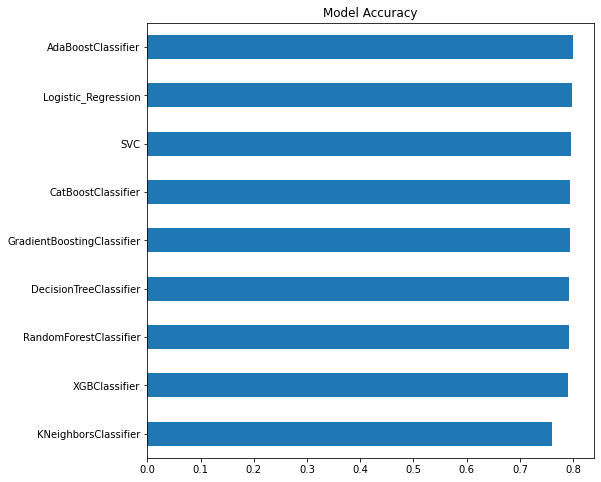

In [44]:
#Plot of accuracy of all models
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,rf_ac, clf_ac,svr_ac, knn_ac,abc_ac,gb_clf_ac,xgb_clf_ac,cbr_ac], 
        index=['Logistic_Regression','RandomForestClassifier','DecisionTreeClassifier','SVC','KNeighborsClassifier','AdaBoostClassifier','GradientBoostingClassifier','XGBClassifier','CatBoostClassifier'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accuracy')

## Plot the ROC Curve

Next, we’ll calculate the true positive rate and the false positive rate and create a ROC curve for for all the models by using the Matplotlib data visualization package

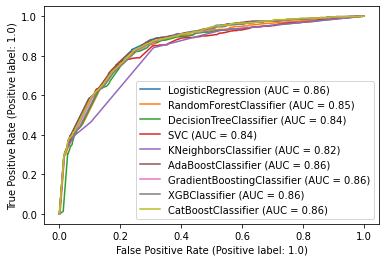

In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay

#create ROC curve for all the models (stands for: “receiver operating characteristic” curve)

disp =  RocCurveDisplay.from_estimator(lr_c, X_test, y_test)

RocCurveDisplay.from_estimator(rf_clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(svc_r, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(abc, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(gb_clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test, ax=disp.ax_);
RocCurveDisplay.from_estimator(cbr, X_test, y_test, ax=disp.ax_);

### we see that  Random forest are the best two model.
